In [2]:
import numpy as np
import pandas as pd
import scipy.stats as ss

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

In [3]:
dating_df = pd.read_csv('dating_data.csv')
dating_df

,user_id_1,user_id_2,group,is_match
0,79,91,1,1
1,716,353,1,1
2,423,677,0,0
3,658,165,1,1
4,969,155,0,1
...,...,...,...,...
14509,476,631,0,0
14510,455,770,1,0
14511,260,6,1,1
14512,885,812,1,1


In [4]:
dating_df.groupby('group', as_index=False).agg({'is_match':'count'})

,group,is_match
0,0,4792
1,1,9722


In [5]:
A_group = dating_df[dating_df.group == 0]
A_group

,user_id_1,user_id_2,group,is_match
2,423,677,0,0
4,969,155,0,1
5,227,162,0,0
8,223,295,0,0
10,825,388,0,0
...,...,...,...,...
14502,535,545,0,0
14503,128,268,0,0
14505,544,600,0,0
14506,903,505,0,0


In [6]:
B_group = dating_df[dating_df.group == 1]
B_group

,user_id_1,user_id_2,group,is_match
0,79,91,1,1
1,716,353,1,1
3,658,165,1,1
6,435,16,1,0
7,602,327,1,0
...,...,...,...,...
14508,527,647,1,0
14510,455,770,1,0
14511,260,6,1,1
14512,885,812,1,1


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


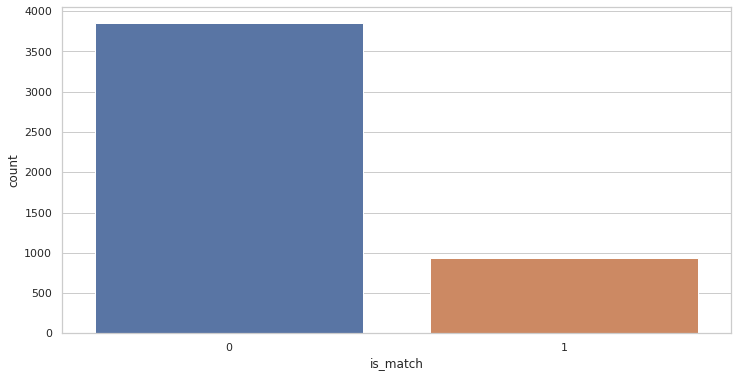

In [7]:
sns.countplot(A_group.is_match)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


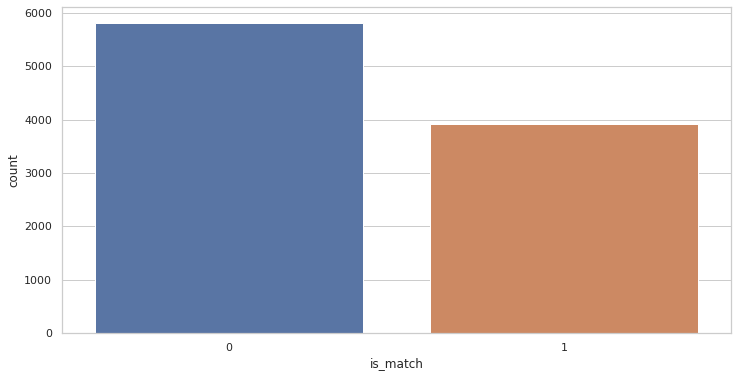

In [8]:
sns.countplot(B_group.is_match)

In [9]:
pd.crosstab(dating_df.group, dating_df.is_match)

is_match,0,1
group,,
0,3858,934
1,5813,3909


### Так как сравниваем две категориальные переменные, используем критерий хи-квадрат.

In [10]:
stat, p, dof, expected = ss.chi2_contingency(pd.crosstab(dating_df.group, dating_df.is_match))

In [11]:
stat, p

(618.6889141576198, 1.4418299163662586e-136)

### Таким образом, имеются статистически значимые различия в результатах, так как p-value < 0.05. Следует выкатывать фичу
